In [1]:
import cv2
import mediapipe as mp
import math
import os
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
import collections


In [2]:
def calculate_the_angles(results):
    #calcula 3 angulos de las articulaciones de cada dedo, en orden descendente (desde las articulaciones superiores hasta las inferiores). Esto de los de 4 dedos de la mano (excluyendo el pulgar) ej:  {0:[7,7,7], 1:[7,7,7], 2:[7,7,7], 3:[7,7,7]}
    hand_angles = {}
    despl = 0

    for i in range(4):
        #angulos superiores
        vector1 = [results.landmark[8+despl].x - results.landmark[7+despl].x, results.landmark[8+despl].y - results.landmark[7+despl].y, results.landmark[8+despl].z - results.landmark[7+despl].z]
        vector2 = [ results.landmark[6+despl].x-results.landmark[7+despl].x, results.landmark[6+despl].y - results.landmark[7+despl].y,  - results.landmark[6+despl].z - results.landmark[7+despl].z]
        
        # Calcula el producto cruz entre los vectores
        producto_cruz = [vector1[1] * vector2[2] - vector1[2] * vector2[1],
                            vector1[2] * vector2[0] - vector1[0] * vector2[2],
                            vector1[0] * vector2[1] - vector1[1] * vector2[0]]
        # Calcula el ángulo en radianes usando el producto cruz
        angulo_radianes = math.atan2(math.sqrt(sum(i**2 for i in producto_cruz)), sum(vector1[i] * vector2[i] for i in range(len(vector1))))
        # Convierte el ángulo de radianes a grados
        angulo_grados = math.degrees(angulo_radianes)
        hand_angles[i] = [angulo_grados]


        #angulos del medio
        vector1 = [results.landmark[7+despl].x - results.landmark[6+despl].x, results.landmark[7+despl].y - results.landmark[6+despl].y, results.landmark[7+despl].z - results.landmark[6+despl].z]
        vector2 = [results.landmark[5+despl].x - results.landmark[6+despl].x, results.landmark[5+despl].y - results.landmark[6+despl].y, results.landmark[5+despl].z - results.landmark[6+despl].z]
        # Calcula el producto cruz entre los vectores
        producto_cruz = [vector1[1] * vector2[2] - vector1[2] * vector2[1],
                            vector1[2] * vector2[0] - vector1[0] * vector2[2],
                            vector1[0] * vector2[1] - vector1[1] * vector2[0]]
        # Calcula el ángulo en radianes usando el producto cruz
        angulo_radianes = math.atan2(math.sqrt(sum(i**2 for i in producto_cruz)), sum(vector1[i] * vector2[i] for i in range(len(vector1))))
        # Convierte el ángulo de radianes a grados
        angulo_grados = math.degrees(angulo_radianes)
        hand_angles[i].append(angulo_grados)


        #angulos inferior (respecto al punto inferior: 0 de la palma)
        vector1 = [results.landmark[6+despl].x - results.landmark[5+despl].x, results.landmark[6+despl].y - results.landmark[5+despl].y, results.landmark[6+despl].z - results.landmark[5+despl].z]
        vector2 = [results.landmark[0].x - results.landmark[5+despl].x, results.landmark[0].y - results.landmark[5+despl].y, results.landmark[0].z - results.landmark[5+despl].z]
        # Calcula el producto cruz entre los vectores
        producto_cruz = [vector1[1] * vector2[2] - vector1[2] * vector2[1],
                            vector1[2] * vector2[0] - vector1[0] * vector2[2],
                            vector1[0] * vector2[1] - vector1[1] * vector2[0]]
        # Calcula el ángulo en radianes usando el producto cruz
        angulo_radianes = math.atan2(math.sqrt(sum(i**2 for i in producto_cruz)), sum(vector1[i] * vector2[i] for i in range(len(vector1))))
        # Convierte el ángulo de radianes a grados
        angulo_grados = math.degrees(angulo_radianes)
        hand_angles[i].append(angulo_grados)
        despl+=4
    return hand_angles



In [3]:
# Ruta del directorio
directory = "data/"
files = os.listdir(directory)
IMAGE_FILES = [file for file in files if file.startswith("fist_")]

for file in files:
    if file.startswith("palm_"):
        IMAGE_FILES.append(file)
        
#IMAGE_FILES = ['fist_1.PNG', 'mano_abierta_izquierda.jpg']
mp_hands = mp.solutions.hands
total_angles = {}
# For static images:
with mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5) as hands:
    for idx, file in enumerate(IMAGE_FILES):
        # Read an image, flip it around y-axis for correct handedness output (see
        # above).
        image = cv2.imread(directory+file)
        # Convert the BGR image to RGB before processing.
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if not results.multi_hand_landmarks:
            print(f'NO RESULTS: {idx}')
            continue

        angles = calculate_the_angles(results.multi_hand_landmarks[0])
        total_angles[idx] = angles



In [4]:
import matplotlib.pyplot as plt
ang = {0: 'superior', 1:'medio', 2: 'inferior'}
dedo = {0: 'indice', 1:'medio', 2: 'anular', 3:'meñique'}
def draw_bar_chart(data):
    for finger in range(4):
        for angle in range(3):
            angles = []
            for image_data in data.values():
                finger_angles = image_data[finger]  # escojo el dedo
                angles.append(finger_angles[angle])  # escojo el angulo
            # Crear el gráfico de barras del angulo x de todas las imagenes
            plt.bar(range(len(angles)), angles)
            plt.xlabel('Imagenes 0-7 puños, imagenes 8-15 palmas')
            plt.ylabel(f'Ángulo {ang[angle]} dedo {dedo[finger]}')
            plt.title(f'Diagrama de Barras - Ángulo {ang[angle]}')
            plt.ylim(0, 200)
            plt.show()


In [66]:
#primero accede a la imagen, luego al dedo y luego al angulo
total_angles[4][0][0]

132.35588758501945

In [7]:
#media de los angulos del dedo indice en las imagenes de puño

sum = 0
for i in range(8):
    sum+=total_angles[i][0][0]
print(f'media de los angulos superiores: {sum/8}')

sum = 0
for i in range(8):
    sum+=total_angles[i][0][1]
print(f'media de los angulos medios: {sum/8}')

sum = 0
for i in range(8):
    sum+=total_angles[i][0][2]
print(f'media de los angulos inferiores: {sum/8}')



media de los angulos superiores: 132.53695497298065
media de los angulos medios: 79.32936755135499
media de los angulos inferiores: 119.5506196909634


In [19]:
#para el puño, ver el angulo minimo del dedo indice
min=total_angles[0][0][0]
for i in range(8):
    if total_angles[i][0][0] < min:
        min = total_angles[i][0][0]
print(f'min de los angulos superiores: {min}')

min=total_angles[0][0][1]
for i in range(8):
    if total_angles[i][0][1] < min:
        min = total_angles[i][0][1]
print(f'min de los angulos medios: {min}')

min=total_angles[0][0][2]
for i in range(8):
    if total_angles[i][0][2] < min:
        min = total_angles[i][0][2]
print(f'min de los angulos inferiores: {min}')


min de los angulos superiores: 101.68527774170212
min de los angulos medios: 43.32189637804479
min de los angulos inferiores: 66.65888801564468


In [20]:
#dedo indice de imagenes de palmas

sum = 0
for i in range(8,16,1):
    sum+=total_angles[i][0][0]
print(f'media de los angulos superiores: {sum/8}')

sum = 0
for i in range(8,16,1):
    sum+=total_angles[i][0][1]
print(f'media de los angulos medios: {sum/8}')

sum = 0
for i in range(8,16,1):
    sum+=total_angles[i][0][2]
print(f'media de los angulos inferiores: {sum/8}')



media de los angulos superiores: 134.6453860569691
media de los angulos medios: 172.6725990938452
media de los angulos inferiores: 169.30324749390002


In [22]:
#para el puño, ver el angulo max del dedo indice
max=total_angles[0][0][0]
for i in range(8,16,1):
    if total_angles[i][0][0] > max:
        max = total_angles[i][0][0]
print(f'max de los angulos superiores: {max}')

max=total_angles[0][0][1]
for i in range(8,16,1):
    if total_angles[i][0][1] > max:
        max = total_angles[i][0][1]
print(f'max de los angulos medios: {max}')

max=total_angles[0][0][2]
for i in range(8,16,1):
    if total_angles[i][0][2] > max:
        max = total_angles[i][0][2]
print(f'max de los angulos inferiores: {max}')

max de los angulos superiores: 148.10121375596069
max de los angulos medios: 177.0305489879981
max de los angulos inferiores: 175.04722978368127


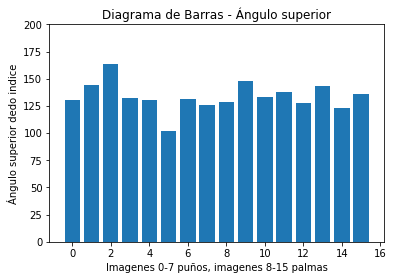

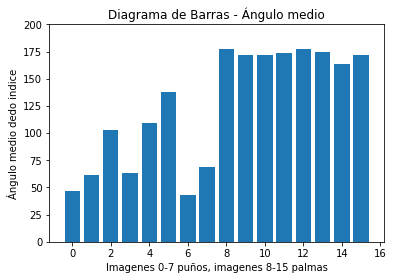

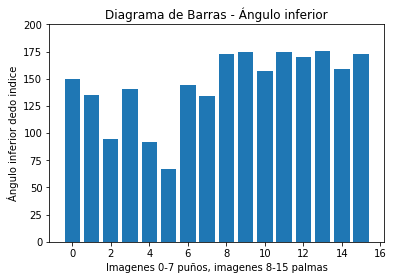

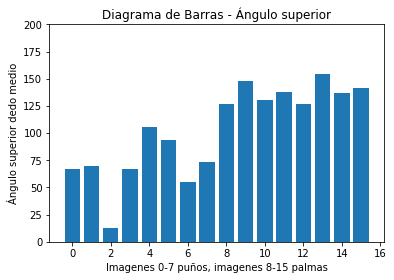

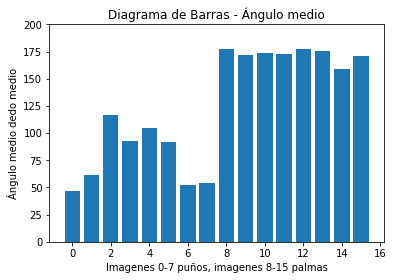

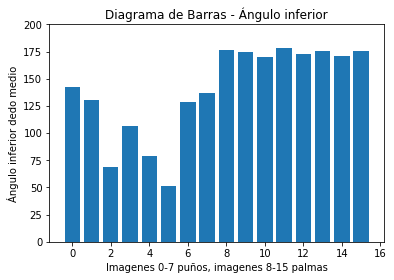

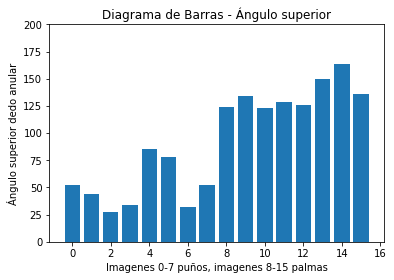

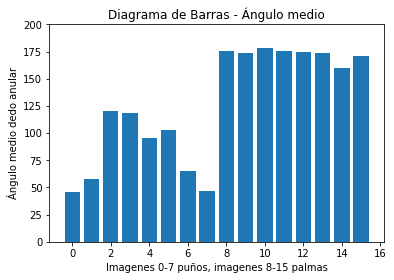

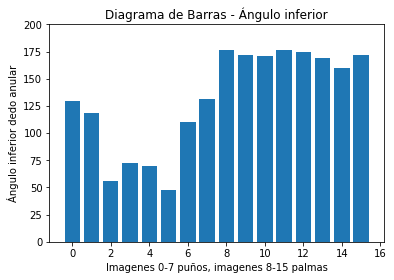

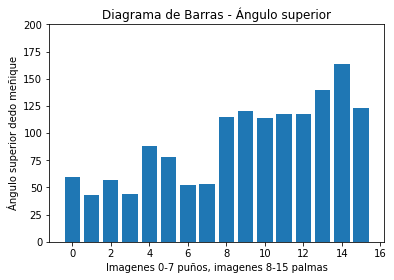

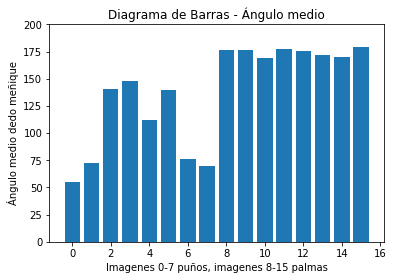

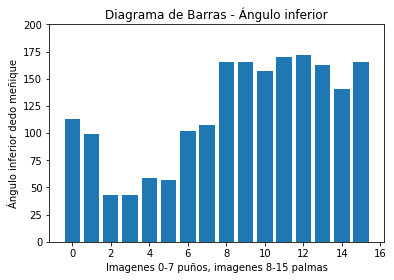

In [55]:
draw_bar_chart(total_angles)

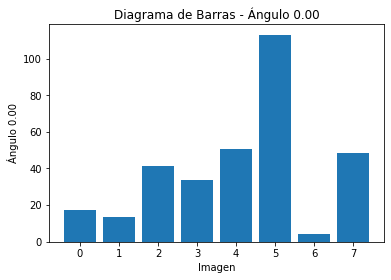

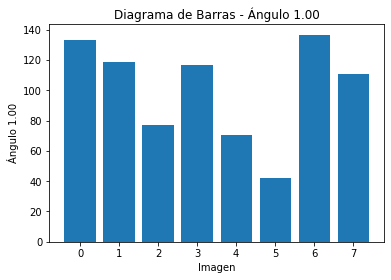

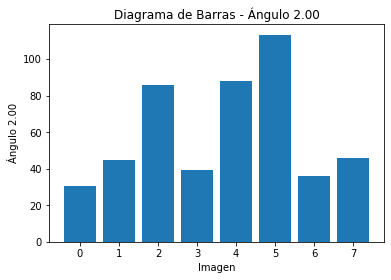

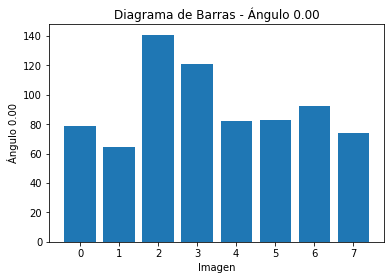

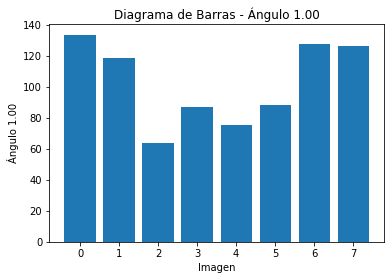

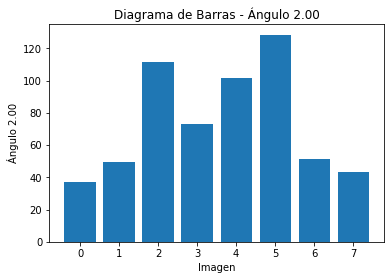

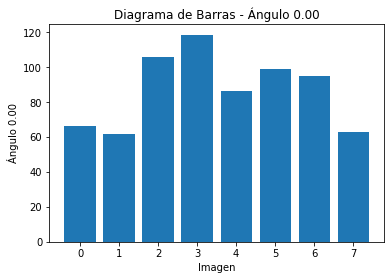

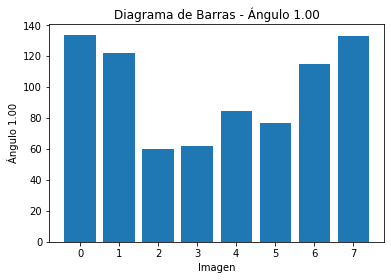

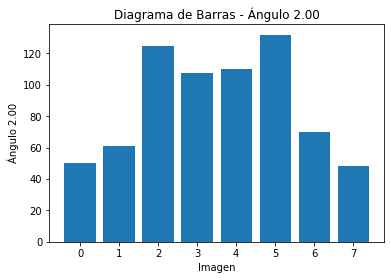

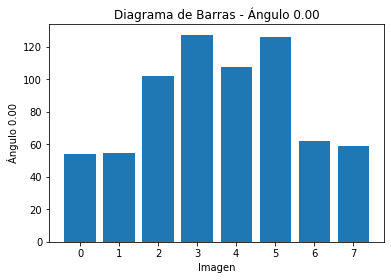

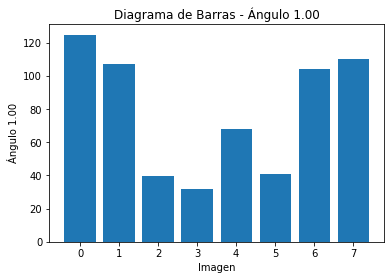

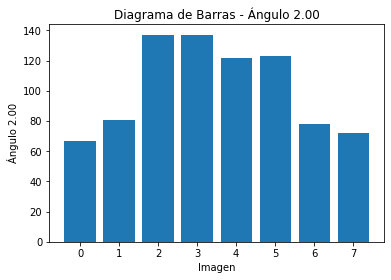

In [159]:
draw_bar_chart(total_angles)

In [112]:
total_angles.keys()

dict_keys([0, 1, 2, 4, 5, 6, 7, 9])

In [119]:
id_img = 3
dedo_indice = 0
angulo_1=0
total_angles[id_img][dedo_indice]

KeyError: 3